In [586]:
#import Histogram as hst
import NumpyClasses as npc
import numpy as np
import matplotlib.pyplot as plt
import utils as u

In [587]:
import importlib

In [588]:
importlib.reload(npc)

<module 'NumpyClasses' from '/Users/roberto/humanroot/utils/PyLHEanalysis/NumpyClasses.py'>

In [589]:
importlib.reload(plt)

<module 'matplotlib.pyplot' from '/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [13]:
import matplotlib
matplotlib.__version__

'3.1.0'

<module 'utils' from '/Users/roberto/scriptbelt/utils.py'>

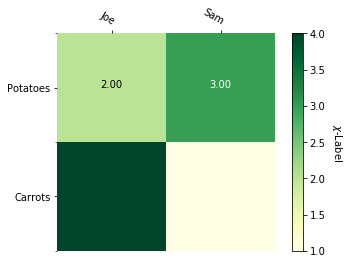

In [590]:
importlib.reload(u)

### 1D constructors from Histograms

In [52]:
hAtInit = hst.Histogram(counts=[11,12,13])

In [53]:
hAtInit.counts

array([11, 12, 13])

In [54]:
hAtInit.uncertainties

array([], dtype=float64)

In [21]:
h1 = hst.Histogram()

In [28]:
h1.values=np.array([100,16,9])

In [23]:
h2 = hst.Histogram()

In [43]:
h2.values=4*np.array([100,16,9])

In [44]:
h12=h1.ratio(h2,uncertainties="Gauss")

In [45]:
h12.values

array([0.25, 0.25, 0.25])

In [46]:
h12.uncertainties

array([0.02795085, 0.06987712, 0.0931695 ])

In [48]:
0.25*np.sqrt(1/100+1/400)

0.02795084971874737

### 1D constructors from NumpyClasses

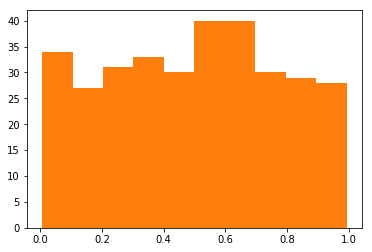

In [78]:
data = np.random.rand(322)
# make the histogram with NumPy
nph = np.histogram( data ) 
# then create a 1DHistogramData holder from the tuple output of np.histogram
h1d = NumpyClasses.Numpy1DHistogramData(tup = nph )
# make the same histogram from Matplotlib
mplh= plt.hist( data )
# create the 1DHistogramData from the tuple output (which now has the "patches" output as well)
h1dmpl = NumpyClasses.Numpy1DHistogramData(tup = mplh )
# the same creation of Histogram objects can be carried out on the derived class Histogram, which inherits from 1DHistogramData 
nph = np.histogram( data ) 
hsimplenp = hst.Histogram(tup = nph )

mplh= plt.hist( data )
h1dmplsimple = hst.Histogram(tup = mplh )

###### Can check the histograms contain the same things

In [72]:
h1d.bins

array([0.00247947, 0.10177423, 0.20106898, 0.30036373, 0.39965848,
       0.49895324, 0.59824799, 0.69754274, 0.79683749, 0.89613225,
       0.995427  ])

In [73]:
h1dmpl.bins

array([0.00247947, 0.10177423, 0.20106898, 0.30036373, 0.39965848,
       0.49895324, 0.59824799, 0.69754274, 0.79683749, 0.89613225,
       0.995427  ])

In [74]:
hsimplenp.bins

array([0.00247947, 0.10177423, 0.20106898, 0.30036373, 0.39965848,
       0.49895324, 0.59824799, 0.69754274, 0.79683749, 0.89613225,
       0.995427  ])

In [75]:
h1dmplsimple.bins

array([0.00247947, 0.10177423, 0.20106898, 0.30036373, 0.39965848,
       0.49895324, 0.59824799, 0.69754274, 0.79683749, 0.89613225,
       0.995427  ])

In [76]:
h1d.counts

array([37, 30, 39, 39, 30, 32, 28, 32, 33, 22])

In [77]:
h1dmplsimple.counts

array([37., 30., 39., 39., 30., 32., 28., 32., 33., 22.])

### 1D constructors from NumpyClasses (standardized)

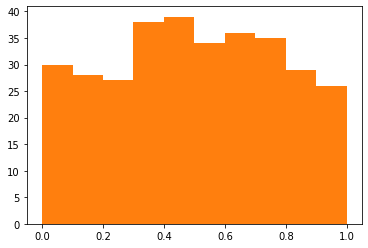

In [68]:
data = np.random.rand(322)
# make the histogram with NumPy
nph = np.histogram( data ) 
# then create a 1DHistogramData holder from the tuple output of np.histogram
h1d = npc.NumpyHistogramData(tup = nph )
# make the same histogram from Matplotlib
mplh= plt.hist( data )
# create the 1DHistogramData from the tuple output (which now has the "patches" output as well)
h1dmpl = npc.NumpyHistogramData(tup = mplh )
# the same creation of Histogram objects can be carried out on the derived class Histogram, which inherits from 1DHistogramData 
nph = np.histogram( data ) 
mplh= plt.hist( data )


###### Can check the histograms contain the same things

In [69]:
h1d.bins

array([0.00129353, 0.10098336, 0.20067319, 0.30036302, 0.40005284,
       0.49974267, 0.5994325 , 0.69912232, 0.79881215, 0.89850198,
       0.99819181])

In [70]:
h1dmpl.bins

array([0.00129353, 0.10098336, 0.20067319, 0.30036302, 0.40005284,
       0.49974267, 0.5994325 , 0.69912232, 0.79881215, 0.89850198,
       0.99819181])

In [71]:
h1d.edges

array([0.00129353, 0.10098336, 0.20067319, 0.30036302, 0.40005284,
       0.49974267, 0.5994325 , 0.69912232, 0.79881215, 0.89850198,
       0.99819181])

In [72]:
h1dmpl.counts

array([30., 28., 27., 38., 39., 34., 36., 35., 29., 26.])

In [73]:
h1d.counts

array([30, 28, 27, 38, 39, 34, 36, 35, 29, 26])

### Multiple Histograms

In [431]:
data2 =[ np.random.power(i,10000) for i in [2,4,8] ] # 3 data samples of which I can make a histogram

#### Plot the data with npc_hist

In [432]:
# Work in progress for a better plot function that returns directly the standardized tuple
# will become npc.hist to replace plt.hist
def npc_hist(data,bins,label=None,histtype='step',**kwargs):
    
    ##############################################
    def make_label(labels,h):
        ##############################################
        try:
            return labels[h]
        except IndexError:
            return ""
        except TypeError:
            return ""
        
    mplHistoMulpliple_Tuple = plt.hist( data ,histtype=histtype, bins=bins,label=label,**kwargs)
    histos = npc.NumpyVectorHistogramData(tup = mplHistoMulpliple_Tuple)

    if label != None:
        plt.legend(bbox_to_anchor=[1,1])
        for h in range(len(histos.histograms) ):
            histos.histograms[h].label = make_label(label,h)
    return histos

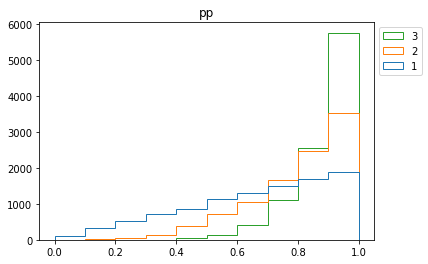

In [433]:
npc_histos = npc_hist(data2,u.arange(0,1,0.1),label=['1','2','3'],histtype='step')
plt.title("pp");

- check the label

In [434]:
npc_histos.histograms[2].label

'3'

##### Re-make the plot using the info in the _NumpyClasses.NumpyVectorHistogramData_

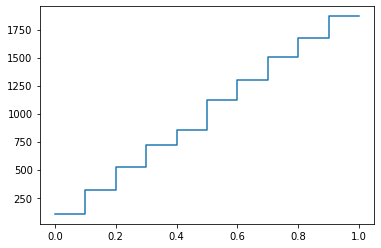

In [435]:
npc.histoPlot(npc_histos.histograms[0])

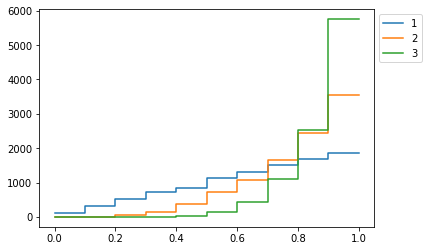

In [436]:
npc.histoPlots(npc_histos)

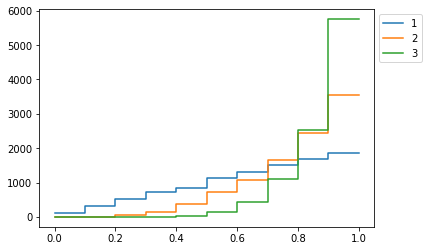

In [437]:
npc.histoPlots(npc_histos,labels=['1','2','3'])

- replot only a subset of the histograms

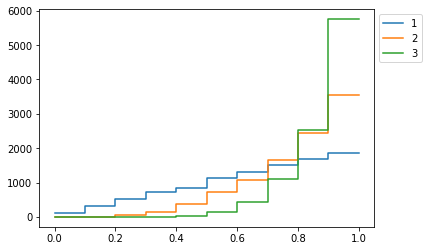

In [438]:
npc.histoPlots(npc_histos,subset=[0,1,2])

#### Plot with Matplotlib 

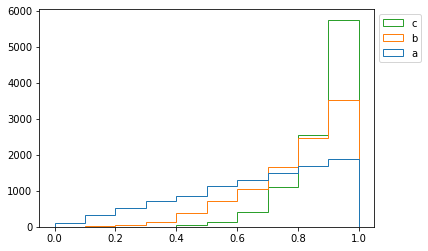

In [439]:
mplHistoMulplipleTuple = plt.hist( data2 , histtype='step', bins=u.arange(0,1,0.1),label=["a","b","c"])
plt.legend(bbox_to_anchor=[1,1])

save the plot as histograms in a NumpyClasses object

In [440]:
histos = npc.NumpyVectorHistogramData(tup = mplHistoMulplipleTuple)

In [441]:
histos.histograms[0].bins==histos.histograms[0].bins

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

plot again only a subset of the histograms

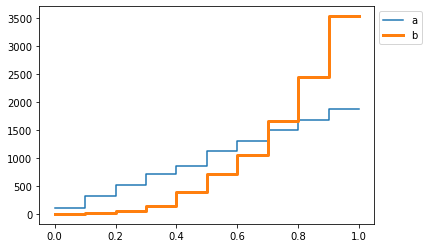

In [442]:
ax = npc.histoPlot(histos.histograms[0],label='a')
npc.histoPlot(histos.histograms[1],linewidth=3, ax=ax,label='b')
ax.legend(bbox_to_anchor=[1,1])

plot them all with a specific function

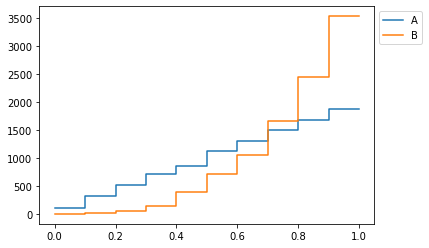

In [443]:
npc.histoPlots(histos,labels=['A','B'],subset=[0,1])#,fmt='o')

plot a subset with a function

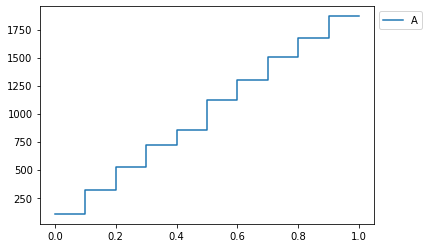

In [444]:
npc.histoPlots(histos,labels=['A','B'],subset=[0])#,fmt='o')

####  Ratios and uncertainties

compute the ratio of the histograms and compute uncertainties assuming the total number of points in each histogram is $10^4$

In [445]:
histosRatios=npc.ratioList(npc_histos,wrt=0,uncertainties=1000)

set  counts
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
set  bins
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
set  counts
[0.         0.03416149 0.11324376 0.18472222 0.44795322 0.63757792
 0.81490015 1.09840426 1.46039309 1.89031568]
set  bins
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
set  counts
[0.         0.         0.00383877 0.00555556 0.04561404 0.12288513
 0.32258065 0.73670213 1.51220965 3.0765115 ]
set  bins
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


/Users/roberto/humanroot/utils/PyLHEanalysis/NumpyClasses.py:269: RuntimeWarning: invalid value encountered in true_divide
  result.uncertainties = getattr(self,counts)/getattr(h2,counts) * u.sumQuadrature( [  np.sqrt(getattr(h2,counts))/getattr(h2,counts)/np.sqrt(_rescaling2) ,  np.sqrt(getattr(self,counts))/getattr(self,counts) /np.sqrt(_rescaling1) ]  )


plot the histograms again one by one by hand

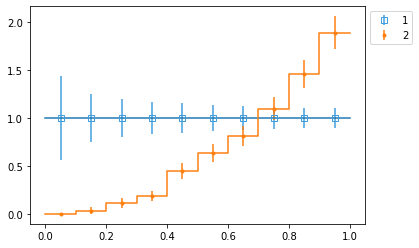

In [446]:
ax = npc.histoPlot(histosRatios.histograms[0],fmt='s',label='1',mfc='none')
npc.histoPlot(histosRatios.histograms[1],lighter_error=1,fmt='.',ax=ax,label='2')
plt.legend(bbox_to_anchor=[1,1])

plot all of them with a function

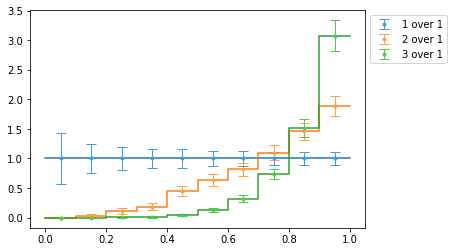

In [499]:
npc.histoPlots(histosRatios)#,labels=['a','v'])#,fmt='o')

labels can still be changed

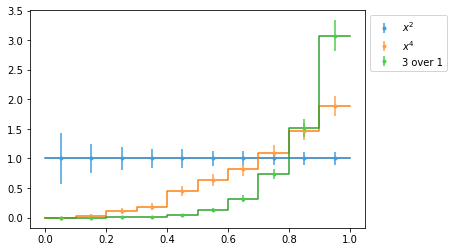

In [448]:
npc.histoPlots(histosRatios,labels=['$x^2$','$x^4$'])#,fmt='o')

central values markers can also be changed

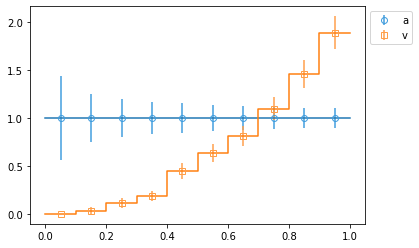

In [449]:
npc.histoPlots(histosRatios,subset=[0,1],labels=['a','v'],fmt=['o','s'],mfc='none')

can also provide the central value marker equal for all

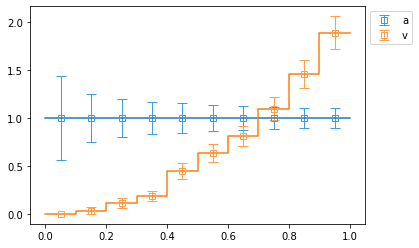

In [484]:
npc.histoPlots(histosRatios,subset=[0,1],labels=['a','v'],fmt='s',mfc='none')

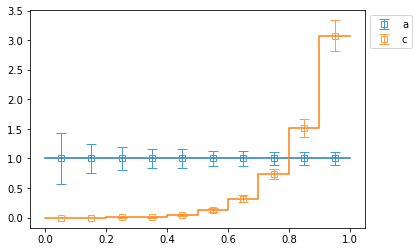

In [493]:
npc.histoPlots(histosRatios,subset=[0,2],labels=['a','b','c'],fmt='s',mfc='none')

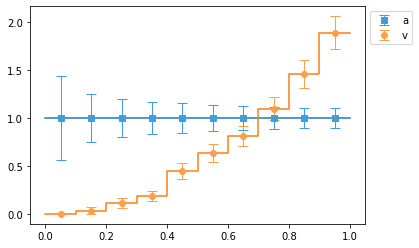

In [492]:
npc.histoPlots(histosRatios,subset=[0,1],labels=['a','v'],fmt=['s','o'])

#### Check some uncertainties

In [494]:
histosRatios.histograms[0].uncertainties

array([0.43643578, 0.24922239, 0.19592783, 0.16666667, 0.15294382,
       0.13345201, 0.12393943, 0.1153164 , 0.10914143, 0.1034452 ])

In [495]:
histosRatios.histograms[1].uncertainties

array([       nan, 0.03312338, 0.04919075, 0.05513173, 0.08709847,
       0.09642236, 0.10657935, 0.12379462, 0.14628904, 0.170976  ])

In [496]:
histos.histograms[1].counts

array([   0.,   11.,   59.,  133.,  383.,  716., 1061., 1652., 2452.,
       3533.])

In [497]:
histos.histograms[0].counts

array([ 105.,  322.,  521.,  720.,  855., 1123., 1302., 1504., 1679.,
       1869.])

In [498]:
c1=1990
c2=3421
print(c2/c1 * np.sqrt(1/np.sqrt(c2)**2 + 1/np.sqrt(c1)**2))
del c1, c2

0.04846583388481339


###  2D Histograms

In [27]:
data2D =1+np.transpose(np.append([np.random.power(1,10000),np.random.power(2,10000),np.random.power(3,10000)],[np.random.power(4,10000)],axis=0)) # 3 data samples of which I can make a histogram

In [28]:
data2D.shape

(10000, 4)

In [29]:
data2D

array([[1.85835417, 1.82739741, 1.81946667, 1.99617059],
       [1.20903059, 1.59681738, 1.34237904, 1.90069067],
       [1.36123174, 1.60035786, 1.57511845, 1.61344379],
       ...,
       [1.34665955, 1.85859487, 1.53164599, 1.97489463],
       [1.67874834, 1.42564186, 1.58071297, 1.97550537],
       [1.79196136, 1.81299182, 1.33905404, 1.63162532]])

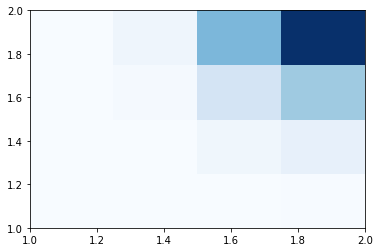

In [382]:
A_tuple_histo2d = plt.hist2d(2-1/data2D[:,2]+data2D[:,2]/5,data2D[:,3],cmap='Blues',bins=[u.linspace(1,2,0.2),u.linspace(1,2,0.2)])

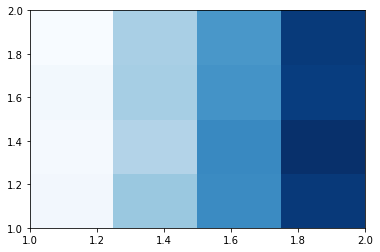

In [383]:
B_tuple_histo2d = plt.hist2d(data2D[:,1],data2D[:,0],cmap='Blues',bins=[u.linspace(1,2,0.2),u.linspace(1,2,0.2)])

In [541]:
nc_histo2D_B = npc.NumpyHistogramData(tup=B_tuple_histo2d)
nc_histo2D_B.snake = u.snake_flatten_matrix(nc_histo2D_B.counts)
nc_histo2D_B.snakebins,nc_histo2D_B.snakelabels = u.snake_bins(nc_histo2D_B)
nc_histo2D_A = npc.NumpyHistogramData(tup=A_tuple_histo2d)
nc_histo2D_A.snake = u.snake_flatten_matrix(nc_histo2D_A.counts)
nc_histo2D_A.snakebins,nc_histo2D_A.snakelabels = u.snake_bins(nc_histo2D_A)

In [507]:
print(nc_histo2D_A.snake)
print(nc_histo2D_B.snake)

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.990e+02 7.600e+01 1.300e+01
 3.000e+00 7.000e+00 1.870e+02 8.120e+02 2.074e+03 4.531e+03 1.693e+03
 3.720e+02 3.300e+01]
[ 165.  154.  163.  136.  477.  485.  446.  520.  783.  791.  751.  736.
 1089. 1079. 1130. 1095.]


In [508]:
print(nc_histo2D_A.snakebins)
print(nc_histo2D_B.snakelabels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
['1.0 1.0', '1.0 1.25', '1.0 1.5', '1.0 1.75', '1.25 1.0', '1.25 1.25', '1.25 1.5', '1.25 1.75', '1.5 1.0', '1.5 1.25', '1.5 1.5', '1.5 1.75', '1.75 1.0', '1.75 1.25', '1.75 1.5', '1.75 1.75']


In [542]:
npc_histos=npc.NumpyVectorHistogramData()
npc_histos.histograms=[nc_histo2D_A,nc_histo2D_B]

In [592]:
snake_bins(npc_histos.histograms[0])#,op=lambda x,y: str(x)+' '+str(y))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [591]:
npc_ratios=npc.ratioList(npc_histos,bins='snakebins',counts='snake',uncertainties='Gauss')

/Users/roberto/humanroot/utils/PyLHEanalysis/NumpyClasses.py:226: RuntimeWarning: invalid value encountered in true_divide
  except AttributeError:
/Users/roberto/humanroot/utils/PyLHEanalysis/NumpyClasses.py:271: RuntimeWarning: invalid value encountered in true_divide
  # assume this is the number of events in each histogram
/Users/roberto/humanroot/utils/PyLHEanalysis/NumpyClasses.py:226: RuntimeWarning: divide by zero encountered in true_divide
  except AttributeError:
/Users/roberto/humanroot/utils/PyLHEanalysis/NumpyClasses.py:271: RuntimeWarning: divide by zero encountered in true_divide
  # assume this is the number of events in each histogram


In [593]:
npc_ratios.histograms[0].snakelabels

['1.0 1.0',
 '1.0 1.25',
 '1.0 1.5',
 '1.0 1.75',
 '1.25 1.0',
 '1.25 1.25',
 '1.25 1.5',
 '1.25 1.75',
 '1.5 1.0',
 '1.5 1.25',
 '1.5 1.5',
 '1.5 1.75',
 '1.75 1.0',
 '1.75 1.25',
 '1.75 1.5',
 '1.75 1.75']

In [594]:
npc_ratios.histograms[0].snake

array([nan, nan, nan, nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.])

In [397]:
len(npc_ratios.histograms[0].uncertainties)

16

In [398]:
len(npc_ratios.histograms[0].snakebins)

16

In [597]:
npc_ratios.histograms[1].snake

array([         inf,          inf,          inf,          inf,
         2.39698492,   6.38157895,  34.30769231, 173.33333333,
       111.85714286,   4.22994652,   0.92487685,   0.35486982,
         0.24034429,   0.63733018,   3.03763441,  33.18181818])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

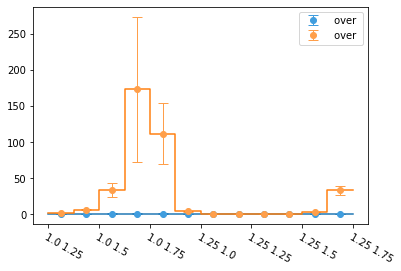

In [568]:
ax = npc.histoPlots(npc_ratios,bins='snakebins',counts='snake',fmt='o')
ax.set_xticklabels(npc_ratios.histograms[0].snakelabels)
plt.setp(ax.get_xticklabels(), rotation=-30, ha="left",
             rotation_mode="anchor")

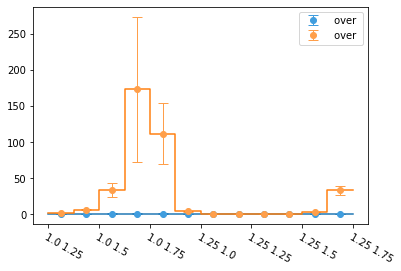

In [574]:
npc.histoPlots(npc_ratios,bins='snakebins',counts='snake',fmt='o')

In [577]:
_ratio=npc.ratioH1overH2(nc_histo2D_A,nc_histo2D_B,counts='snake')

In [578]:
_ratio.snake

array([0.        , 0.        , 0.        , 0.        , 0.41719078,
       0.15670103, 0.02914798, 0.00576923, 0.00893997, 0.23640961,
       1.08122503, 2.81793478, 4.16069789, 1.56904541, 0.32920354,
       0.03013699])

In [579]:
_ratio=npc.ratioH1overH2(nc_histo2D_A,nc_histo2D_B,counts='counts')

In [580]:
_ratio.counts

array([[0.        , 0.        , 0.        , 0.        ],
       [0.00576923, 0.02914798, 0.15670103, 0.41719078],
       [0.00893997, 0.23640961, 1.08122503, 2.81793478],
       [0.03013699, 0.32920354, 1.56904541, 4.16069789]])

In [581]:
_ratio.bins

(array([1.  , 1.25, 1.5 , 1.75, 2.  ]), array([1.  , 1.25, 1.5 , 1.75, 2.  ]))

In [582]:
_ratio.counts[:]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.00576923, 0.02914798, 0.15670103, 0.41719078],
       [0.00893997, 0.23640961, 1.08122503, 2.81793478],
       [0.03013699, 0.32920354, 1.56904541, 4.16069789]])

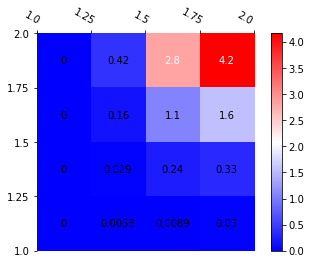

In [583]:
ax = plt.gca()
im, cbar = u.heatmap(_ratio.counts,\
          _ratio.bins[0],_ratio.bins[1],cmap='bwr',offsetx=0.5,offsety=0,transpose=True,reverse=True,minor=False)#,extent=(0.,_ratio.counts.shape[0],0,_ratio.counts.shape[1]))
#ax.set_xticks(np.arange(-0.5,len(_ratio.bins[0])-1,1))
#ax.set_yticks(np.arange(-0.5,len(_ratio.bins[1])-1,1))
# ... and label them with the respective list entries.
ax.set_xticklabels(_ratio.bins[0]);
ax.set_yticklabels(_ratio.bins[1][::-1]);
texts = u.annotate_heatmap(im, valfmt="{x:.2g}",range_display=[-0.2,19.3])

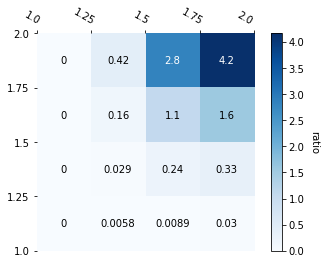

In [584]:
ax = plt.gca()
im, cbar = u.histo2D(_ratio.counts,\
          _ratio.bins[0],_ratio.bins[1],cmap='Blues',cbarlabel='ratio')
texts = u.annotate_heatmap(im, valfmt="{x:.2g}",range_display=[0.,20])

Text(0, 0.5, 'cbarlabel')

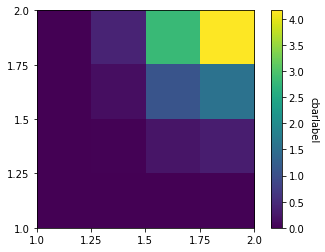

In [585]:
ax = plt.gca()
im = ax.imshow(np.transpose(_ratio.counts)[::-1],extent=(0,_ratio.counts.shape[0],0,_ratio.counts.shape[1]))
ax.set_xticks(u.arange(0,len(_ratio.bins[0])-1,1))
ax.set_yticks(u.arange(0,len(_ratio.bins[1])-1,1))
# ... and label them with the respective list entries.
ax.set_xticklabels(_ratio.bins[0]);
ax.set_yticklabels(_ratio.bins[1]);
cbar = ax.figure.colorbar(im, ax=ax)#, **cbar_kw)
cbar.ax.set_ylabel('cbarlabel', rotation=-90, va="bottom")
#ax.set_xticks(np.arange(8), minor=True)
#texts = u.annotate_heatmap(im, valfmt="{x:.2g}",range_display=[-0.2,1.93])